# Testing auto-differentiation of 'predict' method with Zygote.jl

### Model training

In [1]:
import Pkg
Pkg.activate("..")

  Activating project at `c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl`

In [2]:
using Flux
using Flux: gradient
using LaplaceRedux
using LinearAlgebra
using Plots
using Statistics
using Zygote
using DelimitedFiles

In [3]:
xs, ys = LaplaceRedux.Data.toy_data_non_linear(200)
X = hcat(xs...) # bring into tabular format
data = zip(xs,ys)

zip([[3.086012628747238, 2.656653645512776], [0.9804901298780646, 1.8144486138816716], [0.8604007941986218, 4.554515671647808], [4.162255678480503, 2.4212973334467964], [3.9619889757356863, 3.8675188445459376], [4.37554322222412, 3.404603277578446], [2.9121559056943913, 0.7903224062397414], [2.5631257903521694, 3.811060334800521], [3.2480063150667697, 3.9611674705423754], [1.856356562005867, 0.7745008302042027]  …  [-1.330557330450279, 3.5345996149128664], [-2.3848967994052104, 1.2688733185190881], [-1.6475728182070064, 4.985157444179526], [-2.330119367504978, 1.3564994983867003], [-3.7793441168196615, 1.1380421951349666], [-1.5848979015857947, 2.682428425907745], [-4.837927998058414, 1.9524199505497952], [-1.4587281554744917, 3.4069711486734606], [-4.736717899300542, 0.5209001476732397], [-3.003737384866682, 0.9474890001235733]], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [4]:
n_hidden = 10
D = size(X,1)
nn = Chain(
    Dense(D, n_hidden, σ),
    Dense(n_hidden, 1)
)
println(D)
print(Flux.params(nn))
loss(x, y) = Flux.Losses.logitbinarycrossentropy(nn(x), y) 

2


Params([

Float32[-0.69319695 -0.1073696; 0.44631025 0.679561; 0.43972513 -0.4220818; 0.20124951 -0.5655544; -0.12066069 -0.048467275; -0.26212886 -0.63861096; 0.24103166 0.30734485; 0.042214703 0.5762663; 0.04327242 0.6686974; 0.13701662 -0.37693477], 

Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.084020406 -0.6711963 -0.37520304 -0.03723829 0.22415492 -0.090222515 0.54003364 -0.0134482235 0.39642975 -0.396436], Float32[0.0]])

loss (generic function with 1 method)

In [5]:
using Flux.Optimise: update!, Adam
opt = Adam(1e-3)
epochs = 100
avg_loss(data) = mean(map(d -> loss(d[1],d[2]), data))
show_every = epochs/10

for epoch = 1:epochs
  for d in data
    gs = gradient(Flux.params(nn)) do
      l = loss(d...)
    end
    update!(opt, Flux.params(nn), gs)
  end
  if epoch % show_every == 0
    println("Epoch " * string(epoch))
    @show avg_loss(data)
  end
end

┌ Warning: Layer with Float32 parameters got Float64 input.
│   The input will be converted, but any earlier layers may be very slow.
│   layer = Dense(2 => 10, σ)
│   summary(x) = 2-element Vector{Float64}
└ @ Flux C:\Users\adeli\.julia\packages\Flux\FWgS0\src\layers\stateless.jl:50


Epoch 10


avg_loss(data) = 0.6645687494426966
Epoch 20
avg_loss(data) = 0.5718795765936374


Epoch 30
avg_loss(data) = 0.43754108875989917
Epoch 40
avg_loss(data) = 0.3157727716118097


Epoch 50
avg_loss(data) = 0.23077808625996113
Epoch 60
avg_loss(data) = 0.17549782041460277


Epoch 70
avg_loss(data) = 0.13922894328832627
Epoch 80
avg_loss(data) = 0.1143406186439097


Epoch 90
avg_loss(data) = 0.09628943444229662
Epoch 100
avg_loss(data) = 0.08255875145085156


loss(exp.(logP₀), exp.(logσ)) = 40.316973438580625
Log likelihood: -16.511750290170312
Log det ratio: 34.80555241405
Scatter: 12.804893882770628
loss(exp.(logP₀), exp.(logσ)) = 40.28644901563841
Log likelihood: -16.511750290170312
Log det ratio: 36.08535894840753
Scatter: 11.464038502528673
loss(exp.(logP₀), exp.(logσ)) = 40.28559128949081
Log likelihood: -16.511750290170312
Log det ratio: 35.898891047174686
Scatter: 11.648790951466315
loss(exp.(logP₀), exp.(logσ)) = 40.28559127670022
Log likelihood: -16.511750290170312
Log det ratio: 35.89923875878428
Scatter: 11.648443214275535
loss(exp.(logP₀), exp.(logσ)) = 40.28559126893711
Log likelihood: -16.511750290170312
Log det ratio: 35.89985472829538
Scatter: 11.647827229238217

┌ Info: Iteration 50: P₀=0.07409780734239492, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:285
┌ Info: Iteration 100: P₀=0.066338708005159, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:285
┌ Info: Iteration 150: P₀=0.06740781107565275, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:285
┌ Info: Iteration 200: P₀=0.06740579883223985, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:285
┌ Info: Iteration 250: P₀=0.06740223432471339, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:285



loss(exp.(logP₀), exp.(logσ)) = 40.285591268856436
Log likelihood: -16.511750290170312
Log det ratio: 35.89979376962175
Scatter: 11.647888187750487
loss(exp.(logP₀), exp.(logσ)) = 40.28559126885601
Log likelihood: -16.511750290170312
Log det ratio: 35.899798098044926
Scatter: 11.647883859326477
loss(exp.(logP₀), exp.(logσ)) = 40.28559126885603
Log likelihood: -16.511750290170312
Log det ratio: 35.8997978740705
Scatter: 11.647884083300935
loss(exp.(logP₀), exp.(logσ)) = 40.28559126885599
Log likelihood: -16.511750290170312
Log det ratio: 35.899797875927575


┌ Info: Iteration 300: P₀=0.06740258707204105, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:285
┌ Info: Iteration 350: P₀=0.06740256202484181, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:285
┌ Info: Iteration 400: P₀=0.06740256332091005, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:285
┌ Info: Iteration 450: P₀=0.06740256331016328, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:285


Scatter: 11.647884081443777
loss(exp.(logP₀), exp.(logσ)) = 40.28559126885603
Log likelihood: -16.511750290170312
Log det ratio: 35.89979787723965
Scatter: 11.64788408013179
...


┌ Info: Iteration 500: P₀=0.06740256330257123, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:285


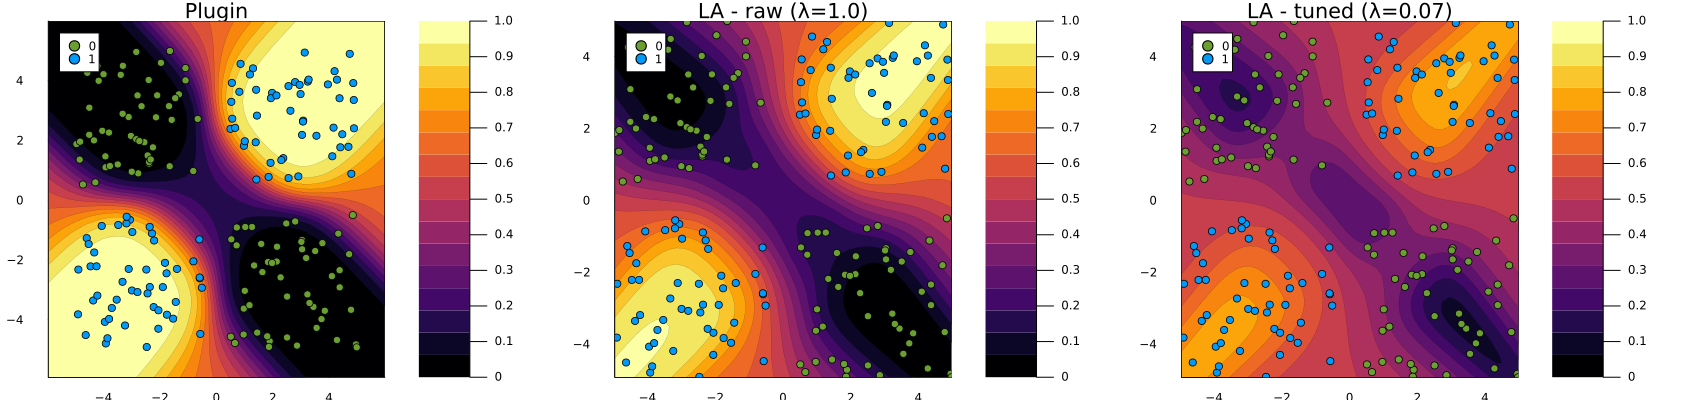

In [6]:
la = Laplace(nn; likelihood=:classification, subset_of_weights=:all)
fit!(la, data)

la_untuned = deepcopy(la)   # saving for plotting
optimize_prior!(la; verbose=true, n_steps=500)

zoom=0
println("...")
p_plugin = plot(la, X, ys; title="Plugin", link_approx=:plugin, clim=(0,1))
p_untuned = plot(la_untuned, X, ys; title="LA - raw (λ=$(unique(diag(la_untuned.P₀))[1]))", clim=(0,1), zoom=zoom)
p_laplace = plot(la, X, ys; title="LA - tuned (λ=$(round(unique(diag(la.P₀))[1],digits=2)))", clim=(0,1), zoom=zoom)
plot(p_plugin, p_untuned, p_laplace, layout=(1,3), size=(1700,400))

loss(exp.(logP₀), exp.(logσ)) = 25.4562553886876
Log likelihood: -16.511750290170312
Log det ratio: 13.238461243782151
Scatter: 4.650548953252429
loss(exp.(logP₀), exp.(logσ)) = 25.45658306920435
Log likelihood: -16.511750290170312
Log det ratio: 13.28831230894382
Scatter: 4.601353249124254
loss(exp.(logP₀), exp.(logσ)) = 25.45621061005314
Log likelihood: -16.511750290170312
Log det ratio: 13.205108644138738
Scatter: 4.683811995626924
loss(exp.(logP₀), exp.(logσ)) = 25.456208279244372
Log likelihood: -16.511750290170312
Log det ratio: 13.211617052521433
Scatter: 4.677298925626684
loss(exp.(logP₀), exp.(logσ)) = 25.456208267252173
Log likelihood: -16.511750290170312
Log det ratio: 13.211148854663314
Scatter: 4.677767099500404
loss(exp.(logP₀), exp.(logσ)) = 25.4562082671858
Log likelihood: -16.511750290170312
Log det ratio: 13.211183179403617
Scatter: 4.67773277462736
loss(exp.(logP₀), exp.(logσ)) = 25.456208267185566
Log likelihood: -16.511750290170312
Log det ratio: 13.211181219710316

┌ Info: Iteration 50: P₀=0.07982041605368348, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:285
┌ Info: Iteration 100: P₀=0.07897603797895779, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:285
┌ Info: Iteration 150: P₀=0.08039133142480041, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:285
┌ Info: Iteration 200: P₀=0.08027954334076307, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:285
┌ Info: Iteration 250: P₀=0.08028757891543639, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:285
┌ Info: Iteration 300: P₀=0.0802869897751704, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\

loss(exp.(logP₀), exp.(logσ)) = 25.456208267185566
Log likelihood: -16.511750290170312
Log det ratio: 13.211181244124507
Scatter: 4.677734709905997
loss(exp.(logP₀), exp.(logσ)) = 25.456208267185573
Log likelihood: -16.511750290170312
Log det ratio: 13.211181243429582
Scatter: 4.677734710600938
...


┌ Info: Iteration 450: P₀=0.08028702299162453, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:285
┌ Info: Iteration 500: P₀=0.08028702300355224, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:285


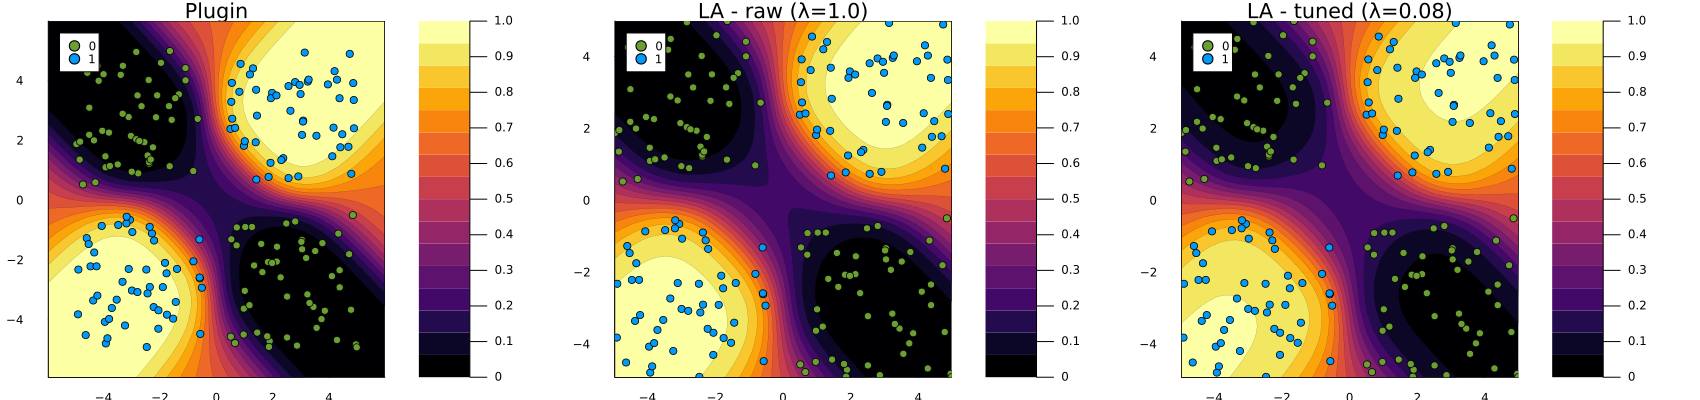

In [7]:
la = Laplace(nn; likelihood=:classification, subset_of_weights=:last_layer)
fit!(la, data)

la_untuned = deepcopy(la)   # saving for plotting
optimize_prior!(la; verbose=true, n_steps=500)

zoom=0
println("...")
p_plugin = plot(la, X, ys; title="Plugin", link_approx=:plugin, clim=(0,1))
p_untuned = plot(la_untuned, X, ys; title="LA - raw (λ=$(unique(diag(la_untuned.P₀))[1]))", clim=(0,1), zoom=zoom)
p_laplace = plot(la, X, ys; title="LA - tuned (λ=$(round(unique(diag(la.P₀))[1],digits=2)))", clim=(0,1), zoom=zoom)
plot(p_plugin, p_untuned, p_laplace, layout=(1,3), size=(1700,400))

In [8]:
la = Laplace(nn; likelihood=:classification, subset_of_weights=:sub_network, sub_network_indices=[[1, 3, 5, 7], [1]])
fit!(la, data)

la_untuned = deepcopy(la)   # saving for plotting
optimize_prior!(la; verbose=true, n_steps=500)

zoom=0
println("...")
p_plugin = plot(la, X, ys; title="Plugin", link_approx=:plugin, clim=(0,1))
p_untuned = plot(la_untuned, X, ys; title="LA - raw (λ=$(unique(diag(la_untuned.P₀))[1]))", clim=(0,1), zoom=zoom)
p_laplace = plot(la, X, ys; title="LA - tuned (λ=$(round(unique(diag(la.P₀))[1],digits=2)))", clim=(0,1), zoom=zoom)
plot(p_plugin, p_untuned, p_laplace, layout=(1,3), size=(1700,400))

KeyError: KeyError: key Float32[-0.9808414, -0.9524214, 1.3465879, -1.2805363, -0.8238743, -0.6149534, 1.0730807, 1.1051458] not found